<h1 style="font-size: 300%">Traffic data</h1>

In [1]:
import math
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pd.__version__)            # 1.5.1
print("seaborn version:", sns.__version__)          # 0.12.1

scikit-learn version: 1.3.0
pandas version: 2.1.0
seaborn version: 0.12.2


# Data requirements

| Variable Name           | Data Type | Data Format         | Field Size | Description                                      |
|-------------------------|-----------|---------------------|------------|--------------------------------------------------|
| Highway ID              | String    |                     | 4          | Identifier for the different highways in The Netherlands. |
| Travel direction        | String    |                     | 20         | The direction of the traffic jam based on the hectometer direction. |
| Begin hectometer        | Numerical |                     | 4          | Identifier for the begin location on the highway. |
| End hectometer          | Numerical |                     | 4          | Identifier for the end location on the highway.   |
| Traffic jam time start  | DateTime  | DD:MM:YYYY HH:MM:ss | 8          | The start time of the traffic jam.                |
| Traffic jam time end    | DateTime  | DD:MM:YYYY HH:MM:ss | 8          | The end time of the traffic jam.                  |
| Wind speed              | Numerical | m/s                 | 10         | The speed of the wind.                            |
| Rain                    | Numerical | mm/h                | 10         | The amount of rain per hour.                      |
| Snow                    | Numerical | mm/h                | 10         | Amount of snowfall per hour.                      |
| Construction date start | DateTime  | DD/MM/YYYY          | 10         | The start date of the road construction.         |
| Construction date end   | DateTime  | DD/MM/YYYY          | 10         | The end date of the road construction.           |
| Intensity               | Numerical |                     | 10         | The intensity on the road.                       |
| Congestion cause        | String    |                     |            | The reason for the congestion.                   |
| Amount of delay         | Numerical | minutes             |            | The time amount of the congestion.               |

**Version 1.0**
### Data volume 
Factors Influencing Data Volume:
Complexity of the Problem:
•	The complexity of predicting traffic congestion is high. There are a lot of varied factors that can impact the congestion. We are going to need a large dataset to find the meaningful patterns that causes the traffic congestion.
Desired Model Accuracy:
•	We are aiming for the highest accuracy possible. This means we are going to need a larger dataset, so we can fine-tune the model.

 ### Define Data Quality Standards

Consistency:
Definition: The uniformity and coherence of data across the dataset.
Criteria: Check consistency in units across unique features. Verify that categorical variables have consistent labelling.
analyse: 

Relevance:
Definition: The degree to which the data is appropriate and useful to predict traffic congestion.
Criteria:
Confirm that selected features align with the objectives of the traffic congestion project.  Exclude irrelevant variables to focus analysis on the important parts.
analyse: After making a heatmap and doing domain understanding we found useful features that have a high correlation with our target variable.

Usability:
Definition: The extent to which the data is easily accessible and interpretable.
Criteria:
Ensure data is well-organized and structured for analysis. Provide clear documentation on data definitions and variable meanings.
analyse: We are going to make sure the names of columns and labels for categories are understandable for anyone. We will also provide clear documentation of our findings and conclusions.
### Consider Ethical and Legal Aspects
All data used cannot be linked to any person or company. Our dataset is completely anonymous and can never harm any persons or businesses privacy. The data we have is open data from the Dutch authority.
### Finish with documenting data requirements
When we make updates to the requirements, we will add these to this document, and give a reason why we added or removed this.



# Data Collection

### Collect the Data
To get the data we need we have made data requirements. We searched for reliable data sources that are available. We ended up with Dutch government agencies such as the KNMI and Rijkswaterstaat. These are reliable data sources to use which contain a lot of data from recent years. We have found 3 data files: the traffic jams of recent years, traffic intensity on the roads and the weather from the weather station on our route. In those traffic datasets we can select every highway in the Netherlands including the specific routes we need for this project.
### Where to Store your Collected Data?
The data we have will be stored locally.  If we would continue working on this project we would publish it on the cloud to improve the work process.
### Use a (traceable) Versioning and Naming System
When we are going to use a new algorithm or edit the model, we will use version numbers for better traceability, so we can track our progress we are making. This can also be applicable for data understanding and data preparation, when we make changes the version number will be updated.
### Determine How and How Often You Want to retrieve (or reload) the data
For the datasets we use we only have CSV files. As a result, the data will not be automatically updated and we download a newer version every month.
We first want to stick to our given routes from Tilburg to Veldhoven. We do this to make it easier for us in the beginning. But after a while we will also have to add the route from Tilburg to Den Bosch. This means that data will have to be added. An additional dataset will have to be added with the weather from Den Bosch. The route to and from Den Bosch is already in the datasets, however we don’t select it in the beginning, but then we have to add the route to our selected data.
### Extend or Limit your Dataset

# Data preparation
 

## Route data filtering
We are going to start of with filtering the data for our route (Tilburg to Veldhoven).

C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\2990365998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['FileZwaarte'] = features['FileZwaarte'].str.replace(',', '.').astype(float)
C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\2990365998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['GemLengte'] = features['GemLengte'].str.replace(',', '.').astype(float)
C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\2990365998.py:16: SettingWithCopyWarning: 
A value is trying to be

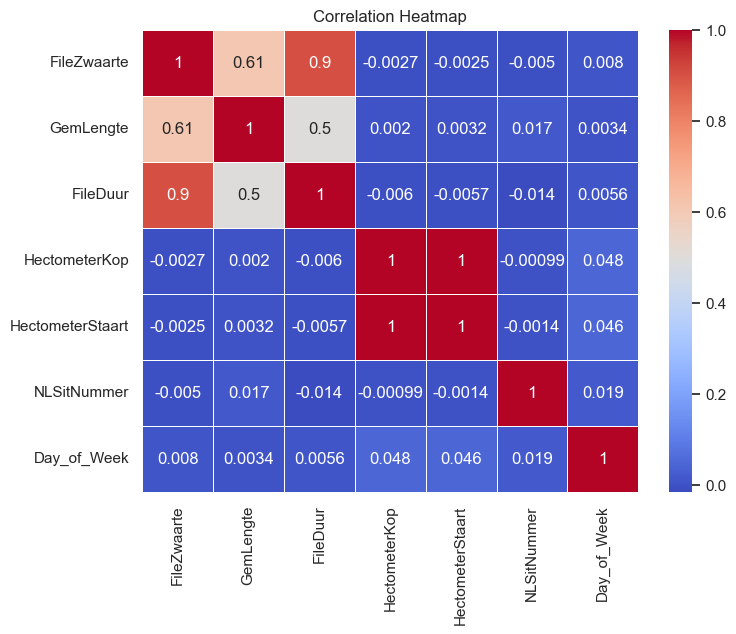

In [2]:
df = pd.read_csv("../New dataset 2022 - 2023_traffic.csv", sep=";")

df['DatumFileBegin'] = pd.to_datetime(df['DatumFileBegin'])
df['Day_of_Week'] = df['DatumFileBegin'].dt.dayofweek
df['DatumFileEind'] = pd.to_datetime(df['DatumFileEind'])
df['Day_of_Week'] = df['DatumFileEind'].dt.dayofweek

df.drop(df[df['Day_of_Week'] >= 5].index, inplace=True)

features = df[['FileZwaarte', 'GemLengte', 'FileDuur', 'HectometerKop', 'HectometerStaart', 'NLSitNummer', 'Day_of_Week']]

# Replace commas with periods and convert to float
# Replace commas with periods and convert to float for the specified columns
features['FileZwaarte'] = features['FileZwaarte'].str.replace(',', '.').astype(float)
features['GemLengte'] = features['GemLengte'].str.replace(',', '.').astype(float)
features['FileDuur'] = features['FileDuur'].str.replace(',', '.').astype(float)
features['HectometerKop'] = features['HectometerKop'].str.replace(',', '.').astype(float)
features['HectometerStaart'] = features['HectometerStaart'].str.replace(',', '.').astype(float)

df["HectometerKop"] = pd.to_numeric(df["HectometerKop"].str.replace(',', '.'), errors="coerce")
df["HectometerStaart"] = pd.to_numeric(df["HectometerStaart"].str.replace(',', '.'), errors="coerce")

combined_filtered_df = df[
    (df["RouteOms"] == "A58") &
    (
        (df["HectometerKop"] <= 35.0) & (df["HectometerKop"] >= 13.4) |
        (df["HectometerStaart"] <= 35.0) & (df["HectometerStaart"] >= 13.4)
    )
]

combined_filtered_df["TrajNaar"].unique()
# Calculate the correlation matrix
correlation_matrix = features.corr()

# Create and display the heatmap
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


1. **Data Cleaning for Numeric Columns:**
   - Convert "HectometerKop" and "HectometerStaart" columns to numeric values.
   - Replace commas with dots and handle conversion errors by replacing them with NaN.

2. **Data Filtering for Specific Route and Hectometer Range:**
   - Create a new DataFrame (`combined_filtered_df`) by filtering rows where:
     - "RouteOms" is equal to "A58."
     - Either "HectometerKop" or "HectometerStaart" values fall within the range of 13.4 to 35.0.

3. **Retrieve Unique Values in a Column:**
   - Get the unique values in the "TrajNaar" column of the filtered DataFrame (`combined_filtered_df`) to make sure it worked.

4. **Add day of week**
   - Above we have added the day of the week. We have used them as categories, 0 = Monday -> 6 = Sunday.


# Data columns cleaning

In [3]:
combined_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 24 to 607079
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   NLSitNummer                 15284 non-null  int64         
 1   DatumFileBegin              15284 non-null  datetime64[ns]
 2   DatumFileEind               15284 non-null  datetime64[ns]
 3   TijdFileBegin               15284 non-null  object        
 4   TijdFileEind                15284 non-null  object        
 5   FileZwaarte                 15284 non-null  object        
 6   GemLengte                   15284 non-null  object        
 7   FileDuur                    15284 non-null  object        
 8   HectometerKop               15284 non-null  float64       
 9   HectometerStaart            15284 non-null  float64       
 10  RouteLet                    15284 non-null  object        
 11  RouteNum                    15284 non-null  int64        

TijdFileBegin and TijdFileEind are objects. We are going to convert these to datetime which makes it easier to work with later on.

In [4]:
combined_filtered_df["TijdFileBegin"] = pd.to_timedelta(combined_filtered_df["TijdFileBegin"])
combined_filtered_df["TijdFileEind"] = pd.to_timedelta(combined_filtered_df["TijdFileEind"])
combined_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15284 entries, 24 to 607079
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   NLSitNummer                 15284 non-null  int64          
 1   DatumFileBegin              15284 non-null  datetime64[ns] 
 2   DatumFileEind               15284 non-null  datetime64[ns] 
 3   TijdFileBegin               15284 non-null  timedelta64[ns]
 4   TijdFileEind                15284 non-null  timedelta64[ns]
 5   FileZwaarte                 15284 non-null  object         
 6   GemLengte                   15284 non-null  object         
 7   FileDuur                    15284 non-null  object         
 8   HectometerKop               15284 non-null  float64        
 9   HectometerStaart            15284 non-null  float64        
 10  RouteLet                    15284 non-null  object         
 11  RouteNum                    15284 non-null  

C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\3751252125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_filtered_df["TijdFileBegin"] = pd.to_timedelta(combined_filtered_df["TijdFileBegin"])
C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\3751252125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_filtered_df["TijdFileEind"] = pd.to_timedelta(combined_filtered_df["TijdFileEind"])


As we can see the columns are converted correctly.

# Data cleaning based on the header
We are going tocheck unique values and the head of the table for missing values.

In [5]:
combined_filtered_df.head(5)

,NLSitNummer,DatumFileBegin,DatumFileEind,TijdFileBegin,TijdFileEind,FileZwaarte,GemLengte,FileDuur,HectometerKop,HectometerStaart,...,TrajNaar,OorzaakGronddetail,OorzaakVerloop,OorzaakCodeVerloop,OorzaakCode,Oorzaak_1,Oorzaak_2,Oorzaak_3,"Oorzaak_4,,,,,,,,,,,,,,,,,",Day_of_Week
24,2923462,2022-01-10,2022-01-10,0 days 16:53:00,0 days 17:12:26,"51,188","2634,000","19,433",21.7,23.8,...,Eindhoven,Spitsfile (geen oorzaak gemeld) met gevonden w...,[Geen oorzaakcode opgegeven door VWM 19],[000],002,Spitsfile (geen oorzaak gemeld) met gevonden w...,Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,",0
48,2923880,2022-01-12,2022-01-12,0 days 07:36:00,0 days 07:44:29,"16,967","2000,000","8,483",31.1,33.1,...,Eindhoven,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 8],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,",2
50,2923949,2022-01-12,2022-01-12,0 days 08:26:00,0 days 08:37:27,"24,540","2143,000","11,450",29.1,31.4,...,Eindhoven,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 11],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,",2
81,2925041,2022-01-17,2022-01-17,0 days 08:25:00,0 days 09:00:28,"85,873","2421,000","35,467",19.1,21.4,...,Eindhoven,Spitsfile (geen oorzaak gemeld) met gevonden w...,[Geen oorzaakcode opgegeven door VWM 35],[000],002,Spitsfile (geen oorzaak gemeld) met gevonden w...,Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,",0
85,2925262,2022-01-17,2022-01-17,0 days 17:42:00,0 days 18:09:28,"95,730","3485,000","27,467",25.0,20.0,...,Tilburg,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 27],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,"Hoge intensiteit,,,,,,,,,,,,",0


The first thing we notice is that oorzaak_4 column had 12, behind it and also every variable in the column has this to. 

In [6]:
combined_filtered_df.rename(columns={'Oorzaak_4,,,,,,,,,,,,,,,,,': 'Oorzaak_4'}, inplace=True)
combined_filtered_df['Oorzaak_4'] = combined_filtered_df['Oorzaak_4'].str.rstrip(',' * 12)

C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\580059848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_filtered_df.rename(columns={'Oorzaak_4,,,,,,,,,,,,,,,,,': 'Oorzaak_4'}, inplace=True)
C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\580059848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_filtered_df['Oorzaak_4'] = combined_filtered_df['Oorzaak_4'].str.rstrip(',' * 12)


1. **Column Renaming and Cleaning:**
   - Rename the column "Oorzaak_4,,,,,,,,,,,,,,,,," to "Oorzaak_4."
   - Remove trailing commas at the end of values in the "Oorzaak_4" column.

# Data cleaning unique values
Now it is time to check unique values to see if there is anything wrong.

In [7]:
columns_to_check = ["FileZwaarte", "GemLengte", "FileDuur", "hectometreringsrichting", "Day_of_Week", "TrajNaar", "TijdFileBegin", "OorzaakGronddetail","OorzaakCodeVerloop"]
for column in columns_to_check:
    unique_values = combined_filtered_df[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for FileZwaarte: ['51,188' '16,967' '24,540' ... '37,987' '33,790' '116,280']
Unique values for GemLengte: ['2634,000' '2000,000' '2143,000' ... '4923,000' '4358,000' '3840,000']
Unique values for FileDuur: ['19,433' '8,483' '11,450' ... '19,850' '7,917' '34,683']
Unique values for hectometreringsrichting: ['aflopend' 'oplopend']
Unique values for Day_of_Week: [0 2 3 1 4]
Unique values for TrajNaar: ['Eindhoven' 'Tilburg' 'Breda']
Unique values for TijdFileBegin: <TimedeltaArray>
['0 days 16:53:00', '0 days 07:36:00', '0 days 08:26:00', '0 days 08:25:00',
 '0 days 17:42:00', '0 days 17:57:00', '0 days 17:25:00', '0 days 07:43:00',
 '0 days 16:13:00', '0 days 15:07:00',
 ...
 '0 days 11:11:29', '0 days 12:38:29', '0 days 18:20:29', '0 days 13:34:29',
 '0 days 15:00:30', '0 days 18:28:29', '0 days 13:39:29', '0 days 13:17:29',
 '0 days 14:47:29', '0 days 13:18:29']
Length: 3818, dtype: timedelta64[ns]
Unique values for OorzaakGronddetail: ['Spitsfile (geen oorzaak gemeld) m

### Unique values exploration and cleaning summary

#### FileDuur
- **Issue:** FileDuur contains decimals, which are not relevant to the analysis.
- **Action:** Convert FileDuur values to integers.

#### OorzaakGronddetail
- **Issue:** OorzaakGronddetail has detailed accident reasons, leading to a complex representation.
- **Action:** Simplify reasons to a common category, e.g., 'Ongeluk' (Accident).

#### OorzaakCodeVerloop
- **Issue:** OorzaakCodeVerloop has one column with a lot of , behind it.
- **Action:** remove these.

---

### Detailed Explanation

#### FileDuur
The "FileDuur" column contains decimal values that are not needed for our analysis. To maintain consistency and remove unnecessary precision, we will convert these values to integers.

#### OorzaakGronddetail
The "OorzaakGronddetail" column provides detailed reasons for accidents, resulting in a complex and specific representation. To simplify the data and align with our domain understanding, we plan to categorize these detailed reasons under a broader category, such as 'Ongeluk' (Accident).



In [8]:

combined_filtered_df["FileDuur"] = combined_filtered_df["FileDuur"].str.replace(',', '.').astype(float).round().astype(int)
unique_values_FileDuur = combined_filtered_df["FileDuur"].unique()

unique_ongeval = ['Ongeval(len)','Defecte vrachtwagen(s)','Ongeval vrachtwagen (en incident)','Ongeval (met opruim/berging)','Defect(e) voertuig(en)', 'Ongeval op aansluitende weg (met spitsfile)','Eerder(e) ongeval(len)','Ongeval (in een spitsfile)','Spitsfile (met vrachtwagen)','Spitsfile (defect voertuig en berging)','Spitsfile (met ongeval)','Ongeval vrachtwagen (met opruim/berging)','Defect voertuig (met opruim/berging)','Ongeval met vrachtwagen(s)','Defect voertuig (met spitsfile)','Defecte vrachtwagen (in een spitsfile)','Wegwerkzaamheden','Defecte vrachtwagen (met ongeval)','Spoedtransport','Ongeval op aansluitende weg (met file zonder oorzaak)','Defecte vrachtwagen (met opruim/berging)','Geschaarde aanhanger(s)','Ongeval op aansluitende weg','Ongeval en (file buiten spits zonder oorzaak)','Defecte vrachtwagen (en files buiten spits zonder oorzaak)','Spitsfile (met ongeval op aansluitende weg)','Incident (ongeval vrachtwagen) en incident (defect voertuig)','Spitsfile (met incident op aansluitende weg)','File zonder oorzaak buiten de spits (met ongeval op aansluitende weg)','Spitsfile (met defect voertuig)','Ongeval (met ander incident)','Ongeval (met incident op aanslutiende weg)','Eerder ongeval op aansluitende weg','Ongeval op aansluitende weg (en incident op aansluitende weg)','Onwelwording','Incident op aansluitende weg','Incident (object op de weg) en Files buiten spits zonder oorzaak','Spitsfile (met object op de weg)','Ongeval (en daarna defect voertuig)']

for ongeval in unique_ongeval:
    combined_filtered_df.replace(ongeval, 'Ongeluk', inplace=True)

C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\3341925318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_filtered_df["FileDuur"] = combined_filtered_df["FileDuur"].str.replace(',', '.').astype(float).round().astype(int)
C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\3341925318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_filtered_df.replace(ongeval, 'Ongeluk', inplace=True)


In [9]:
unique = combined_filtered_df["OorzaakGronddetail"].unique()
print(unique)
print("Unique values for rounded FileDuur:", unique_values_FileDuur)

['Spitsfile (geen oorzaak gemeld) met gevonden werk in Spin'
 'Spitsfile (geen oorzaak gemeld)' 'Ongeluk'
 'File buiten spits (geen oorzaak gemeld)'
 'Afremmend verkeer als gevolg van kijkers naar  ongeval(len)'
 'Eerder pechgeval' 'Voorwerpen op de weg' 'Opruimingswerkzaamheden'
 'Opruim/bergingswerkzaamheden (in een spitsfile)'
 'Opgehoogde werkzaamheden' 'Object op de weg (met opruim/berging)'
 'Brandend(e) voertuig(en)' 'Politieactie']
Unique values for rounded FileDuur: [ 19   8  11  35  27   4  46  13  25  43  22  17   5   7  24  85 170  12
  18  30   9   6  15  44  73  10  23  97  42  16  64  28   3  21   1   2
  47  31  26 126  78  39  45  58  14  36  29  38  40  20  50  62  71  59
  48  79  32  51  33  55 115  88  74  37  49  69  54  66 109  92 124  41
  63  70 138  94 168  52  84  57  61  93 106  60  82 101 110 107  34  56
 114  53  81  68  67 159  98  86 119 166  95 113 112  72  80 120  75 275
 111 131  83 183 155  65 141 144  91  89 161 102  76 139  77 104 220 116
 137 160 

As you can see the Fileduur has no numeric values anymore and OorzaakGrondDetail has also been cleaned.

In [10]:
missing_values = combined_filtered_df.isnull().sum()
print("Missing Values for Each Column:")
print(missing_values)


Missing Values for Each Column:
NLSitNummer                  0
DatumFileBegin               0
DatumFileEind                0
TijdFileBegin                0
TijdFileEind                 0
FileZwaarte                  0
GemLengte                    0
FileDuur                     0
HectometerKop                0
HectometerStaart             0
RouteLet                     0
RouteNum                     0
RouteOms                     0
hectometreringsrichting      0
KopWegvakVan                 0
KopWegvakNaar                0
TrajVan                      0
TrajNaar                     0
OorzaakGronddetail           0
OorzaakVerloop               0
OorzaakCodeVerloop         309
OorzaakCode                343
Oorzaak_1                  343
Oorzaak_2                  343
Oorzaak_3                  343
Oorzaak_4                  343
Day_of_Week                  0
dtype: int64


In [11]:
unique_counts = combined_filtered_df['OorzaakCodeVerloop'].value_counts()

print(unique_counts)
combined_filtered_df['OorzaakCodeVerloop'].unique()
combined_filtered_df = combined_filtered_df.drop('OorzaakCodeVerloop', axis=1)

OorzaakCodeVerloop
[000]                  14916
[000],,,,,,,,,,           34
[000], [ACI], [ACA]        5
[000], [ACI]               5
[000], [HBD]               3
[M13]                      2
[000], [RWK]               2
[000], [ACA]               2
[000], [ACH], [INS]        1
[000], [OCL], [ACA]        1
[000], [BKD], [M13]        1
[000], [OCL]               1
[000], [ACH]               1
[ACH]                      1
Name: count, dtype: int64


The three columns OorzaakCodeVerloop, OorzaakVerloop and OorzaakCode all have values that don't match with our expectations. However since we don't see the relevance of these columns to our target we will be filtering them out for the first iteration. We might do some further research into them in upcoming iterations.

After we rounded the values of fileduur we might have causes some values to be 0. Let's see if this is the case

In [12]:
import pandas as pd
combined_filtered_df["FileDuur"] = combined_filtered_df["FileDuur"].replace(',', '.').astype(float).round().astype(int)

total_rows = len(combined_filtered_df)

count_zero_fileduur = (combined_filtered_df["FileDuur"] == 0).sum()

print("Total number of rows:", total_rows)
print("Number of rows with FileDuur equal to 0:", count_zero_fileduur)
combined_filtered_df = combined_filtered_df[combined_filtered_df["FileDuur"] != 0]

Total number of rows: 15284
Number of rows with FileDuur equal to 0: 2


Only 2 instances are equal to 0. Our dataset has 15284 rows so these 2 values are not going to impact anything.

We have 4 more columns with missing values oorzaak_1, oorzaak_2, oorzaak_3 and oorzaak_4. They have the same amount of missing values so we are guessing they are related to each other lets check this out.

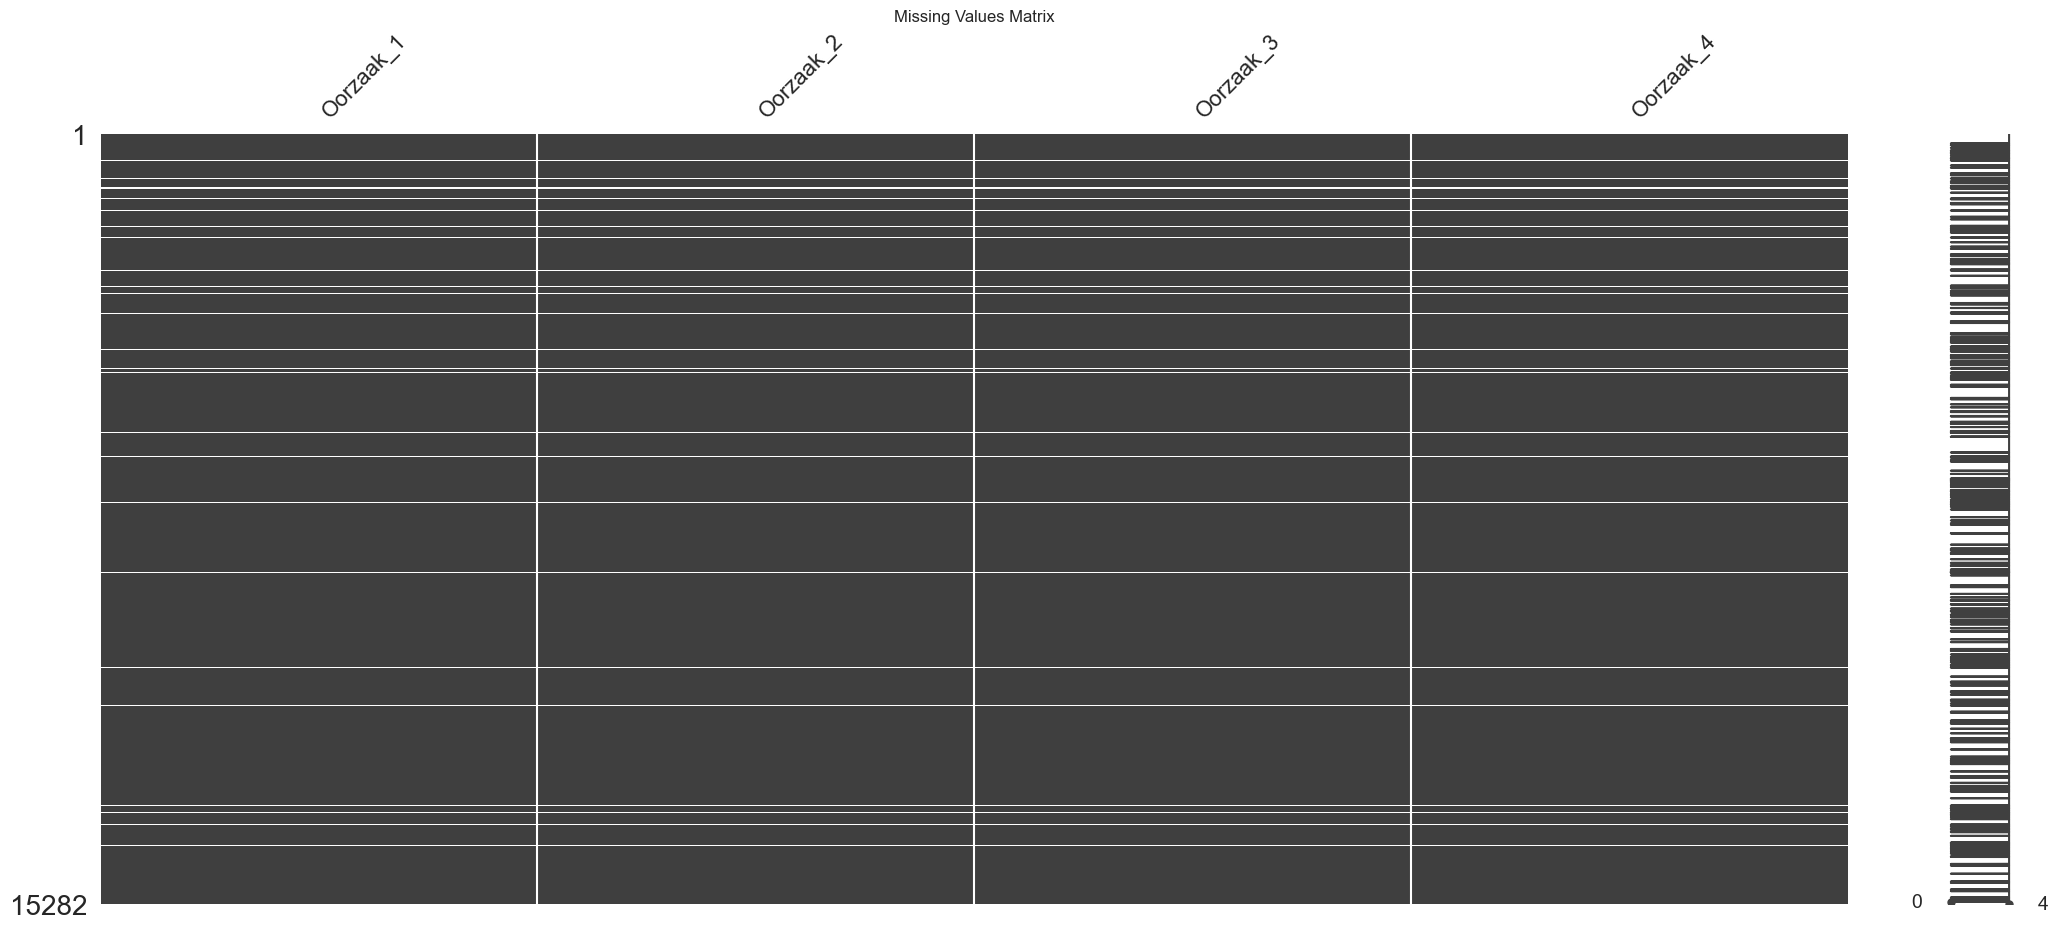

In [13]:
import pandas as pd
import missingno as msno

columns_to_check = ['Oorzaak_1', 'Oorzaak_2', 'Oorzaak_3', 'Oorzaak_4']

missing_values = combined_filtered_df[columns_to_check].isnull()

msno.matrix(combined_filtered_df[columns_to_check])
plt.title('Missing Values Matrix')
plt.show()

As we can see they have a 100% relation if one is missing the rest is also missing. 
(if there is an error make sure to type "pip install missingno" in your cmd)

C:\Users\lolyp\AppData\Local\Temp\ipykernel_34568\2231493000.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_null_values', y='FileZwaarte', data=combined_filtered_df, ci='sd', errcolor='none', ax=ax)
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wi

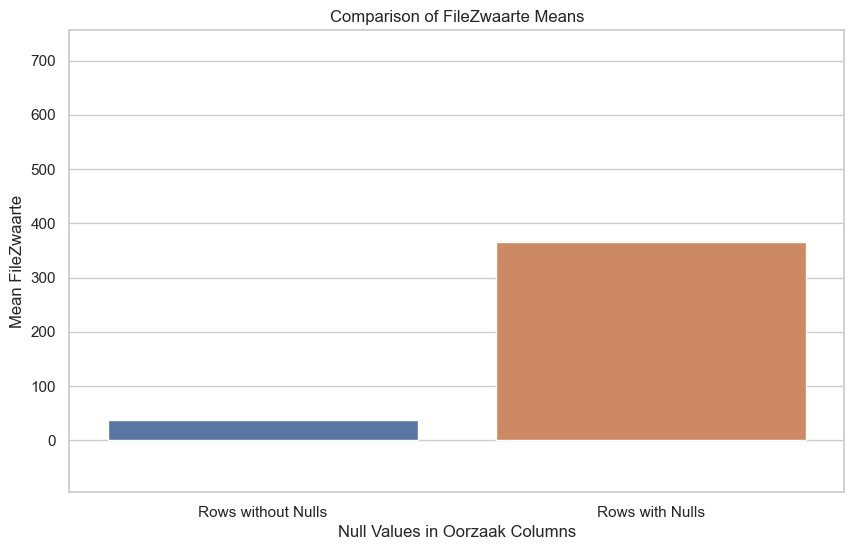

In [14]:
combined_filtered_df['FileZwaarte'] = combined_filtered_df['FileZwaarte'].str.replace(',', '.').astype(float)

combined_filtered_df['FileZwaarte'] = pd.to_numeric(combined_filtered_df['FileZwaarte'])
columns_to_check = ['Oorzaak_1', 'FileZwaarte']  # Adjust column name if needed



#Create a new column to indicate whether the row has null values
combined_filtered_df['has_null_values'] = combined_filtered_df[columns_to_check].isnull().any(axis=1)

#Plotting mean 'FileZwaarte' for rows with and without null values
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='has_null_values', y='FileZwaarte', data=combined_filtered_df, ci='sd', errcolor='none', ax=ax)

ax.set_title('Comparison of FileZwaarte Means')
ax.set_xticks([0, 1])  # Setting tick positions
ax.set_xticklabels(['Rows without Nulls', 'Rows with Nulls'])
ax.set_xlabel('Null Values in Oorzaak Columns')
ax.set_ylabel('Mean FileZwaarte')

plt.show()

Because of the importance of these missing values we are not going to remove them, but instead look for ways to fill them in. We noticed that the relation between Oorzaak_1 and OorzaakGronddetail are nearly 1 to 1 with a few exceptions.

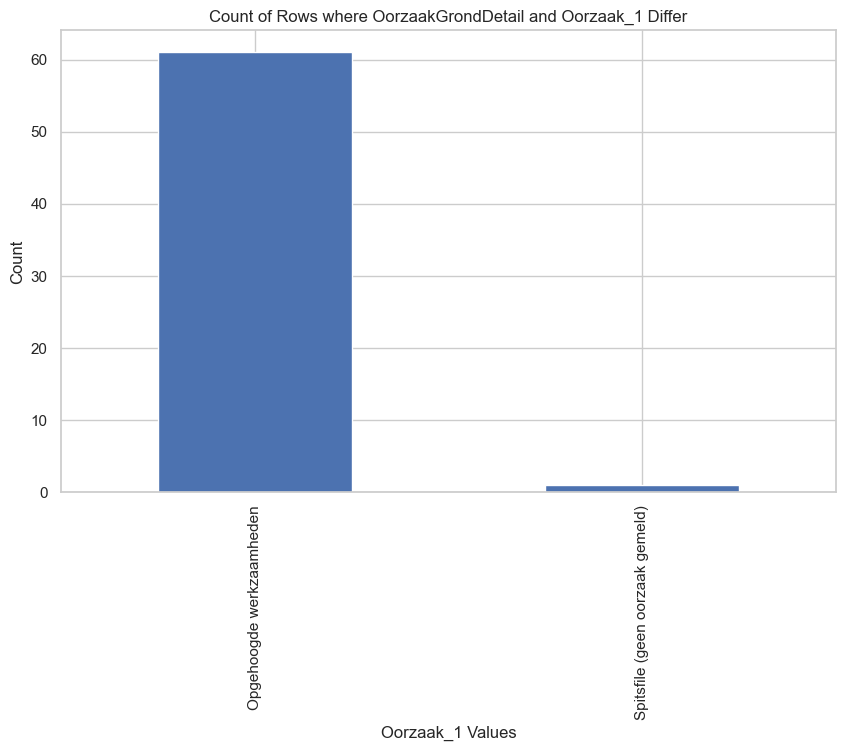

In [15]:

diff_rows = combined_filtered_df[combined_filtered_df['OorzaakGronddetail'].notna() & 
                                combined_filtered_df['Oorzaak_1'].notna() & 
                                (combined_filtered_df['OorzaakGronddetail'] != combined_filtered_df['Oorzaak_1'])]

plt.figure(figsize=(10, 6))
diff_rows['Oorzaak_1'].value_counts().plot(kind='bar')
plt.xlabel('Oorzaak_1 Values')
plt.ylabel('Count')
plt.title('Count of Rows where OorzaakGrondDetail and Oorzaak_1 Differ')
plt.show()

OorzaakGrondDetail and Oorzak_1 nearly have an 1 to 1 relation. In 64 rows this is not the case. In the graph above we see that this is the case by Opgehoogde werkzaamheden nearly all the time. 

In [16]:

condition_opgehoogde_werkzaamheden = (combined_filtered_df['Oorzaak_1'] == 'Opgehoogde werkzaamheden')

opgehoogde_werkzaamheden_rows = combined_filtered_df[condition_opgehoogde_werkzaamheden]

unique_values_counts = opgehoogde_werkzaamheden_rows['OorzaakGronddetail'].value_counts()

print(f"Count of rows for each unique value of OorzaakGrondDetail where Oorzaak_1 equals 'Opgehoogde werkzaamheden':")
print(unique_values_counts)


Count of rows for each unique value of OorzaakGrondDetail where Oorzaak_1 equals 'Opgehoogde werkzaamheden':
OorzaakGronddetail
File buiten spits (geen oorzaak gemeld)    61
Opgehoogde werkzaamheden                   10
Name: count, dtype: int64


When oorzaak_1 is Opgehoogde werkzaamheden we see that only 10 out of 71 are equal to OorzaakGronddetail. 

We can fix these missing values by using the 1 on 1 relations between the oorzaak columns since GrondOorzaakDetail is nevver mising

In [17]:

combined_filtered_df['Oorzaak_1'].fillna(combined_filtered_df['OorzaakGronddetail'], inplace=True)
print(combined_filtered_df[['Oorzaak_1', 'OorzaakGronddetail']])

                                                Oorzaak_1  \
24      Spitsfile (geen oorzaak gemeld) met gevonden w...   
48                        Spitsfile (geen oorzaak gemeld)   
50                        Spitsfile (geen oorzaak gemeld)   
81      Spitsfile (geen oorzaak gemeld) met gevonden w...   
85                        Spitsfile (geen oorzaak gemeld)   
...                                                   ...   
606965                    Spitsfile (geen oorzaak gemeld)   
606985                    Spitsfile (geen oorzaak gemeld)   
606986                    Spitsfile (geen oorzaak gemeld)   
607037                    Spitsfile (geen oorzaak gemeld)   
607079                    Spitsfile (geen oorzaak gemeld)   

                                       OorzaakGronddetail  
24      Spitsfile (geen oorzaak gemeld) met gevonden w...  
48                        Spitsfile (geen oorzaak gemeld)  
50                        Spitsfile (geen oorzaak gemeld)  
81      Spitsfile (geen oor

We have replaced oorzaak_1 with the values of OorzaakGronddetail now we need to do the same with the other columns.

In [18]:
import numpy as np

for unique_value in combined_filtered_df['Oorzaak_1'].unique():
    rows = combined_filtered_df['Oorzaak_1'] == unique_value

    unique_values_oorzaak_2 = combined_filtered_df.loc[rows, 'Oorzaak_2'].dropna().unique()
    unique_values_oorzaak_3 = combined_filtered_df.loc[rows, 'Oorzaak_3'].dropna().unique()

    if 'Oorzaak_4' in combined_filtered_df.columns:
        unique_values_oorzaak_4 = combined_filtered_df.loc[rows, 'Oorzaak_4'].dropna().unique()
    else:
        unique_values_oorzaak_4 = np.array([])

    combined_filtered_df.loc[rows, 'Oorzaak_2'] = combined_filtered_df.loc[rows, 'Oorzaak_2'].fillna(unique_values_oorzaak_2[0] if len(unique_values_oorzaak_2) > 0 else np.nan)
    combined_filtered_df.loc[rows, 'Oorzaak_3'] = combined_filtered_df.loc[rows, 'Oorzaak_3'].fillna(unique_values_oorzaak_3[0] if len(unique_values_oorzaak_3) > 0 else np.nan)
    if len(unique_values_oorzaak_4) > 0:
        combined_filtered_df.loc[rows, 'Oorzaak_4'] = combined_filtered_df.loc[rows, 'Oorzaak_4'].fillna(unique_values_oorzaak_4[0])

The columns Oorzaak_2, Oorzaak_3 and Oorzaak_4 are now also filled in with the corresponding values bases on the 1 on 1 relation of the columns.

In [19]:
nan_count1 = combined_filtered_df['Oorzaak_1'].isnull().sum()
nan_count2 = combined_filtered_df['Oorzaak_2'].isnull().sum()
nan_count3 = combined_filtered_df['Oorzaak_3'].isnull().sum()
nan_count4 = combined_filtered_df['Oorzaak_4'].isnull().sum()
print(f"Count of NaN values in 'Oorzaak_1' column in diff_rows: {nan_count1}")
print(f"Count of NaN values in 'Oorzaak_2' column in diff_rows: {nan_count2}")
print(f"Count of NaN values in 'Oorzaak_3' column in diff_rows: {nan_count3}")
print(f"Count of NaN values in 'Oorzaak_4' column in diff_rows: {nan_count4}")

Count of NaN values in 'Oorzaak_1' column in diff_rows: 0
Count of NaN values in 'Oorzaak_2' column in diff_rows: 21
Count of NaN values in 'Oorzaak_3' column in diff_rows: 21
Count of NaN values in 'Oorzaak_4' column in diff_rows: 21


We still have 21 rows missing this is because we don't have the necessary data for it. For example "objecten op de weg" only exists once in the dataset and is missing so we can't inpute these values. 

In [20]:

combined_filtered_df = combined_filtered_df.dropna(subset=['Oorzaak_2'])

We have dropped these missing values

## Bar chart
Since we dont see a high correlation in the heatmap we want to show that there is. In the bar chart we can see that there is a high correlation between the day of the week and the amount of traffic. We can see that there is a high amount of traffic on the weekdays and low ammount of traffic on the weekends.

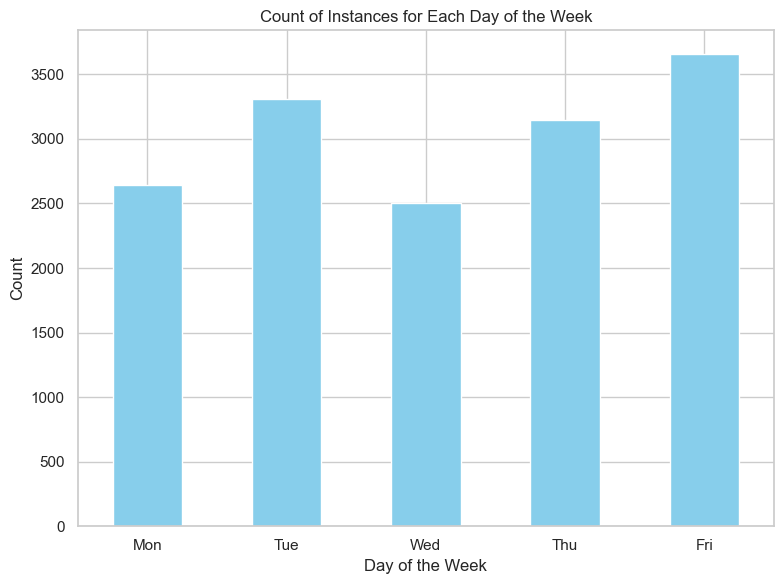

In [21]:
# Count occurrences of each day
day_counts = combined_filtered_df['Day_of_Week'].value_counts()

# Sort by day names
day_counts = day_counts.sort_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
day_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Count of Instances for Each Day of the Week')

# Change x-axis labels
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
plt.xticks(range(len(day_labels)), day_labels, rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

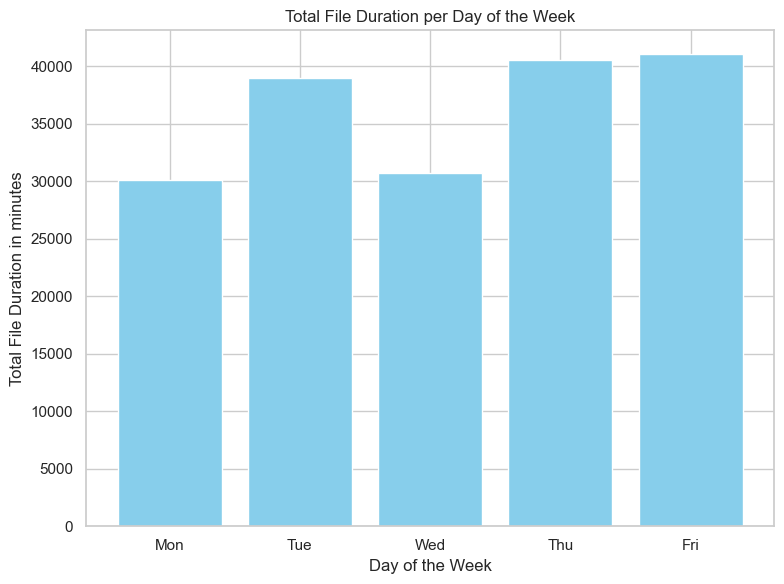

In [22]:
Total_File_Duration = combined_filtered_df.groupby('Day_of_Week')['FileDuur'].sum()
DayofWeek = df['Day_of_Week'].unique()


# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(DayofWeek, Total_File_Duration, color='skyblue')
plt.title('Total File Duration per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total File Duration in minutes')

day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
plt.xticks(range(len(day_labels)), day_labels, rotation=0)

plt.tight_layout()
plt.show()



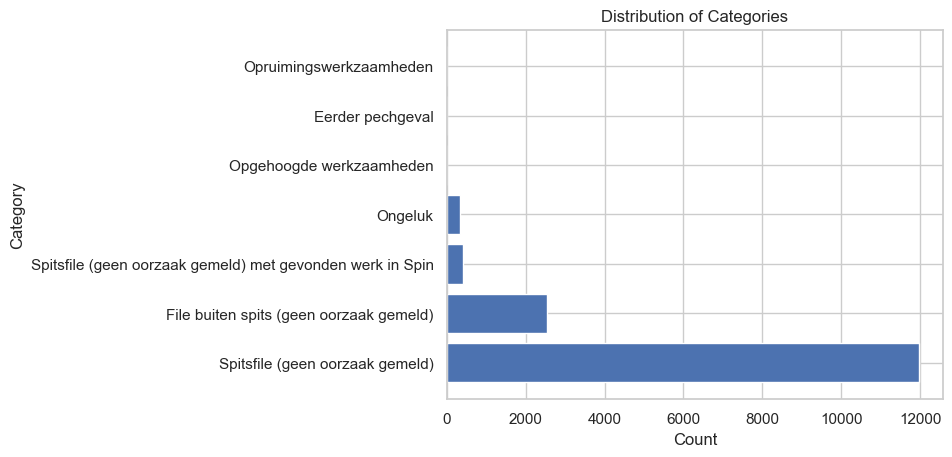

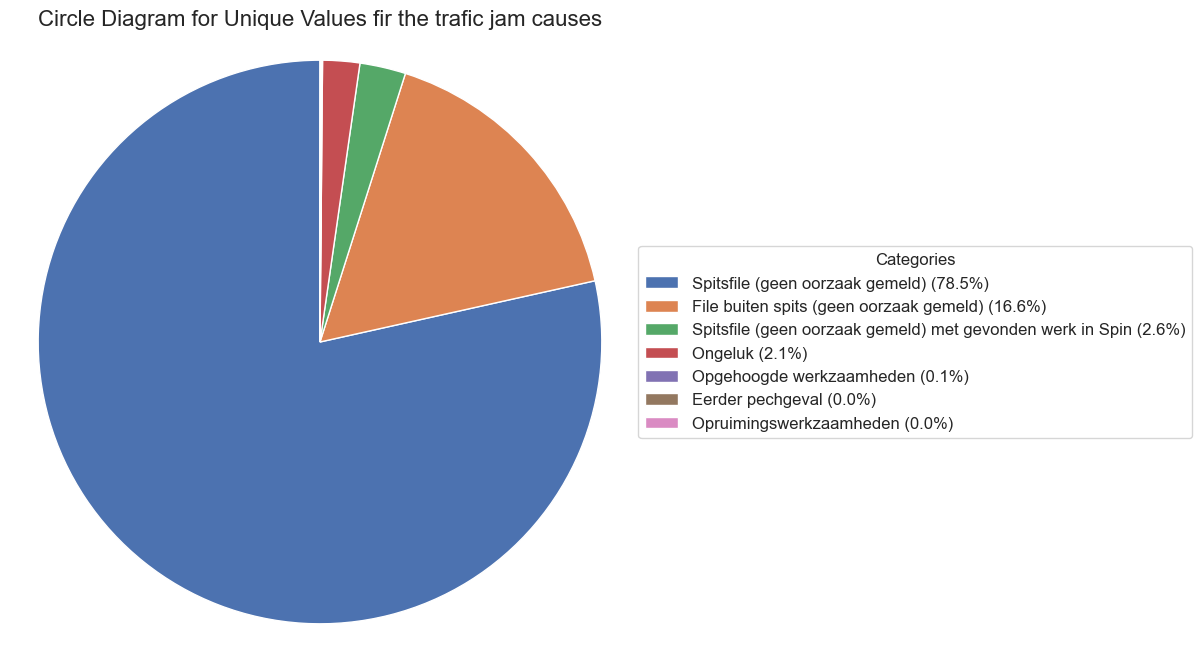

OorzaakGronddetail
Spitsfile (geen oorzaak gemeld)                              11978
File buiten spits (geen oorzaak gemeld)                       2535
Spitsfile (geen oorzaak gemeld) met gevonden werk in Spin      402
Ongeluk                                                        324
Opgehoogde werkzaamheden                                        10
Eerder pechgeval                                                 6
Opruimingswerkzaamheden                                          6
Name: count, dtype: int64

The percentage of "Ongeluk" in OorzaakGronddetail is: 2.12%


In [23]:
Unique_GrondDetail = combined_filtered_df['OorzaakGronddetail'].unique()

# Get unique values and their counts
unique_values = combined_filtered_df['OorzaakGronddetail'].value_counts()

plt.barh(unique_values.index, unique_values)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Categories')

# Show the plot
plt.show()

unique_counts = combined_filtered_df["OorzaakGronddetail"].value_counts()
counts = combined_filtered_df["OorzaakGronddetail"].count()

# Creating labels and sizes for the pie chart
labels = unique_counts.index.tolist()
sizes = unique_counts.values.tolist()

# Plotting the circle diagram
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size as needed
wedges, _ = ax.pie(sizes, labels=None, autopct=None, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Title
plt.title('Circle Diagram for Unique Values fir the trafic jam causes', fontsize=16)

# Add legend on the right side
legend_labels = [f'{label} ({size/counts*100:.1f}%)' for label, size in zip(labels, sizes)]
ax.legend(wedges, legend_labels, title="Categories", bbox_to_anchor=(1, 0.5), loc="center left", fontsize=12)

# Remove autotexts (percentage labels inside the pie chart)
for wedge in wedges:
    wedge.set_edgecolor("white")

# Show the plot
plt.show()

incident_count = combined_filtered_df['OorzaakGronddetail'].value_counts()
display(incident_count)

target_value = 'Ongeluk'
percentage = (incident_count[target_value] / len(combined_filtered_df)) * 100

print(f'The percentage of "{target_value}" in OorzaakGronddetail is: {percentage:.2f}%')

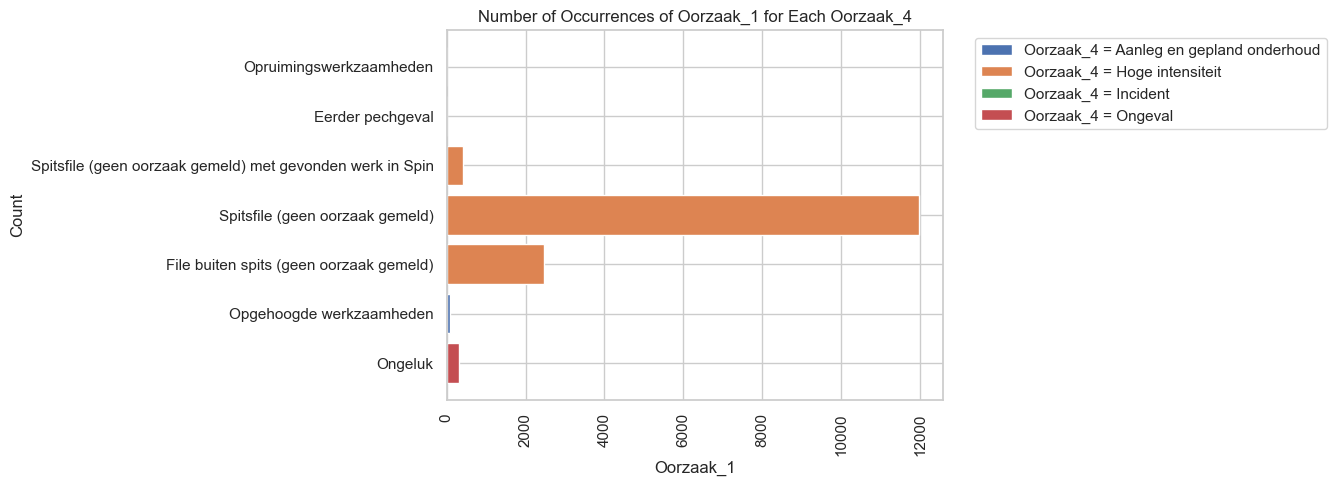

In [24]:

# Group by Oorzaak_4 and count occurrences of each Oorzaak_1 value
grouped_df = combined_filtered_df.groupby(['Oorzaak_4', 'Oorzaak_1']).size().reset_index(name='count')

grouped_df[grouped_df['count'] > 0]

# Plotting a bar chart for each Oorzaak_4 value
fig, ax = plt.subplots()
for group_name, group_data in grouped_df.groupby('Oorzaak_4'):
    ax.barh(group_data['Oorzaak_1'], group_data['count'], label=f'Oorzaak_4 = {group_name}')

# Adding labels and title
plt.xlabel('Oorzaak_1')
plt.ylabel('Count')
plt.title('Number of Occurrences of Oorzaak_1 for Each Oorzaak_4')
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In our domain research we found that 73% of traffic congestions are caused by road intensity. When we 
create a graph for our road we can see that (amount)% are caused by road intensity. This shows that the
cause of congestion for our route is higher then expected.

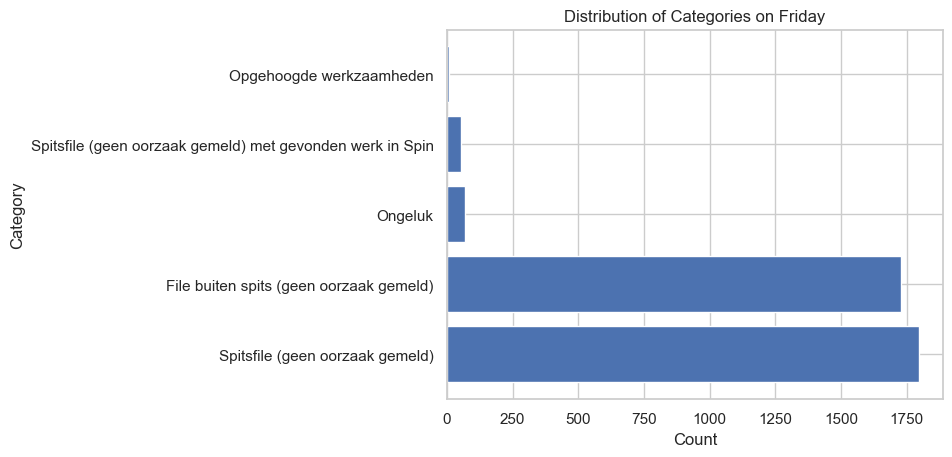

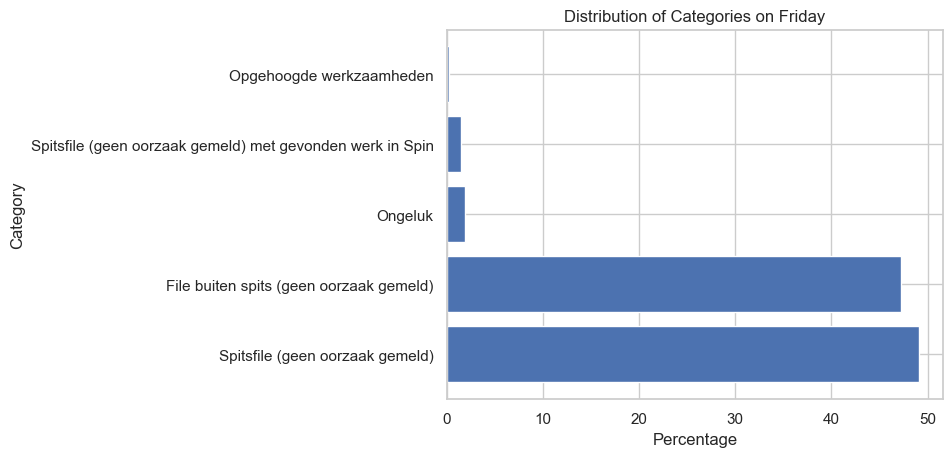

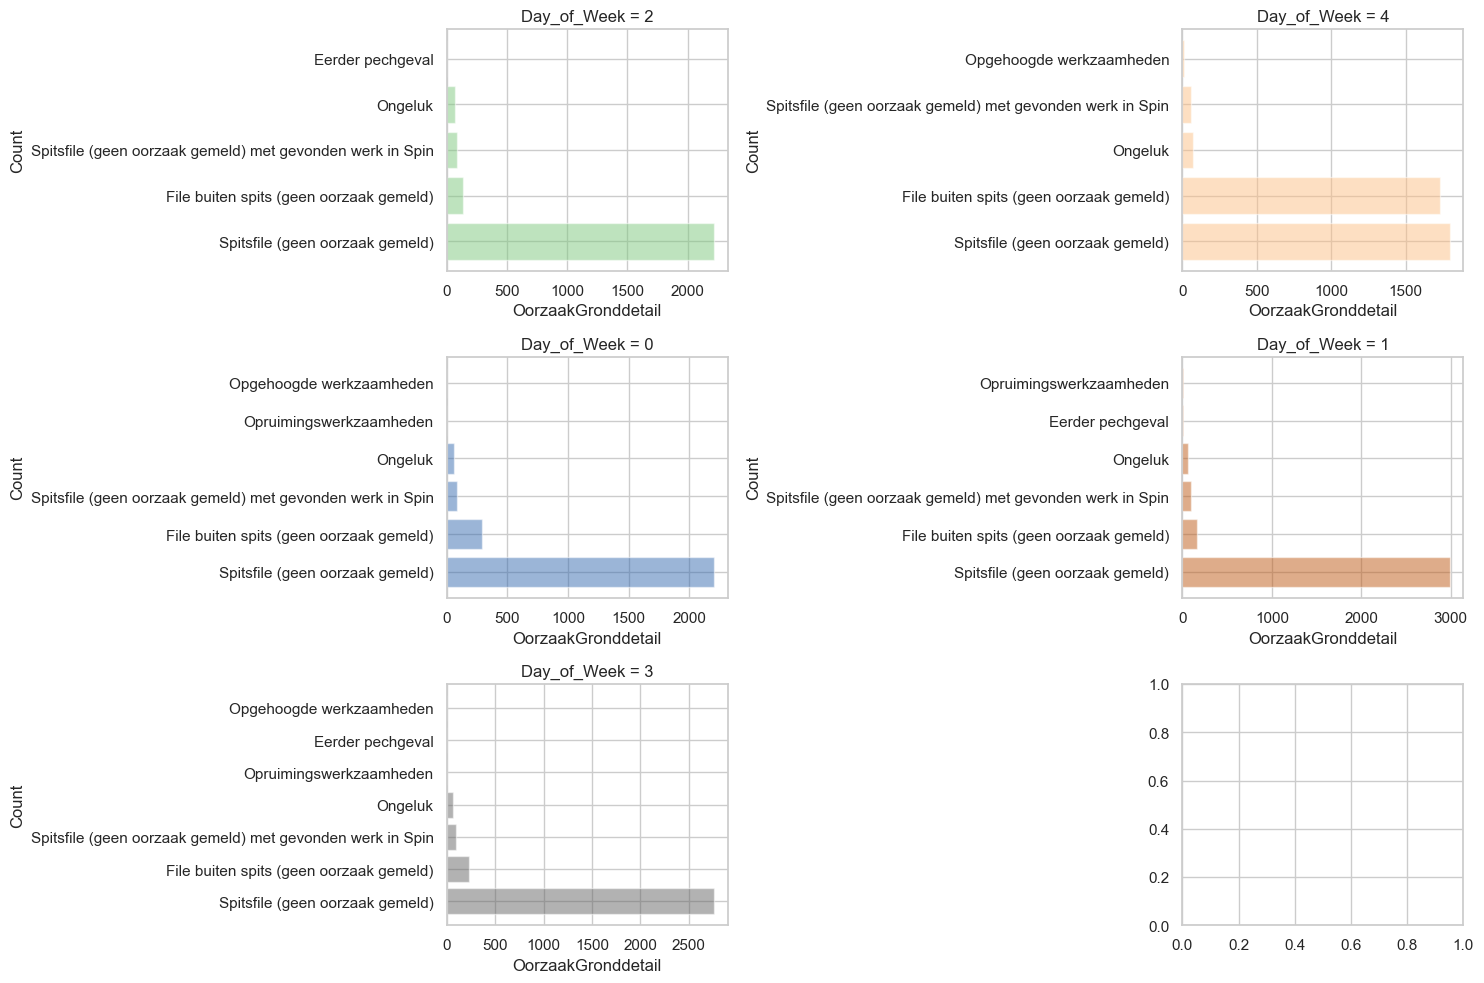

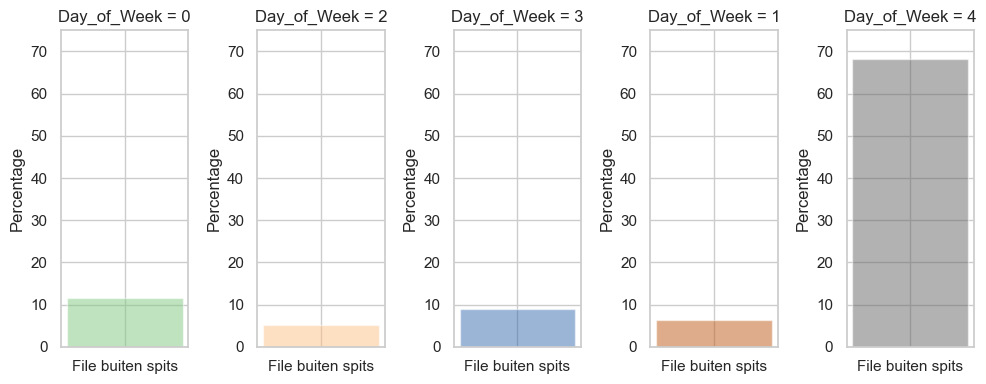

In [25]:
# Filter the DataFrame for Day_of_Week equal to 4
filtered_df = combined_filtered_df[combined_filtered_df['Day_of_Week'] == 4]

# Get unique values and their counts
unique_values = filtered_df['OorzaakGronddetail'].value_counts()

# Plotting a bar chart
plt.barh(unique_values.index, unique_values)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Categories on Friday')

# Show the plot
plt.show()


# Plotting a bar chart
plot_df = combined_filtered_df[combined_filtered_df['Day_of_Week'] == 4]
percentages = plot_df['OorzaakGronddetail'].value_counts(normalize=True) * 100
plt.barh(unique_values.index, percentages)

# Adding labels and title
plt.xlabel('Percentage')
plt.ylabel('Category')
plt.title('Distribution of Categories on Friday')

# Show the plot
plt.show()


fig, axes = plt.subplots(nrows=math.ceil(len(combined_filtered_df['Day_of_Week'].unique())/2), ncols=2, figsize=(15, 2 * len(combined_filtered_df['Day_of_Week'].unique())))
color_map = plt.get_cmap('Accent', len(combined_filtered_df['Day_of_Week'].unique()))

for i, day in enumerate(df['Day_of_Week'].unique()):
    plot_df = combined_filtered_df[combined_filtered_df['Day_of_Week'] == day]
    row = i // 2
    col = i % 2
    color = color_map(i)
    
    # Count occurrences of 'OorzaakGronddetail' for each 'Day_of_Week'
    value_counts = plot_df['OorzaakGronddetail'].value_counts()
    
    axes[row, col].barh(value_counts.index, value_counts, color=color, alpha=0.5)
    axes[row, col].set_title(f'Day_of_Week = {day}')
    axes[row, col].set_xlabel('OorzaakGronddetail')
    axes[row, col].set_ylabel('Count')
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

# Calculate total count of 'File buiten spits'
total_count_file_buiten_spits = combined_filtered_df['OorzaakGronddetail'].eq('File buiten spits (geen oorzaak gemeld)').sum()
total_rows = len(combined_filtered_df)

# Create subplots with all 5 graphs in a single row
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))

color_map = plt.get_cmap('Accent', len(combined_filtered_df['Day_of_Week'].unique()))

for i, day in enumerate(combined_filtered_df['Day_of_Week'].unique()):
    color = color_map(i)
    
    # Calculate the raw percentage of 'File buiten spits' for the current 'Day_of_Week'
    raw_percentage = (combined_filtered_df[combined_filtered_df['Day_of_Week'] == day]['OorzaakGronddetail'].eq('File buiten spits (geen oorzaak gemeld)').sum() / total_count_file_buiten_spits) * 100
    
    # Round the raw percentage for display
    rounded_percentage = round(raw_percentage, 2)
    
    axes[i].bar(['File buiten spits'], [rounded_percentage], color=color, alpha=0.5)
    axes[i].set_title(f'Day_of_Week = {day}')
    axes[i].set_ylim(0, 75)
    axes[i].set_ylabel('Percentage')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Modelling

### Feature selection
These are the features we **currently** have:
- NLSitNummer
- DatumFileBegin
- DatumFileEind
- TijdFileBegin
- TijdFileEind
- FileZwaarte
- GemLengte
- FileDuur
- HectometerKop
- HectometerStaart
- RouteLet
- RouteNum
- RouteOms
- hectometreringsrichting
- KopWegvakVan
- KopWegvakNaar
- TrajVan
- TrajNaar
- OorzaakGronddetail
- OorzaakVerloop
- OorzaakCode
- Oorzaak_1
- Oorzaak_2
- Oorzaak_3
- Oorzaak_4
- Day_of_Week

Here we show what we have discoverd of the features
1. unusable/pointless.
    - DatumFileEind, TijdFileEind, FileZwaarte and GemLengte will never be known at the start of a traffic jam.
    - RouteNum, RouteLet, RouteOms, NLSitNummer, HectometerKop, HectometerStaart, hectometreringsrichting, KopWegvakVan, KopWegvakNaar, TrajVan and TrajNaar have no impact on the model.
    - All features that have Oorzaak in their name have no impact on the model.
    - DatumFileBegin is not usefull in the context of this project as we do not need the exact date. We only need to know what day of the week it is which we have in Day_Of_Week.          

2. usefull
    - Day_of_Week has a small impact on the model.
    - TijdFileBegin has a large impact on the model.
    - FileDuur is what we want to predict.

The features we will be using to train the model are: Day_Of_Week and TijdFileBegin.

In [26]:
# Import libraries for ML part
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score





In [27]:
print(combined_filtered_df.columns)

Index(['NLSitNummer', 'DatumFileBegin', 'DatumFileEind', 'TijdFileBegin',
       'TijdFileEind', 'FileZwaarte', 'GemLengte', 'FileDuur', 'HectometerKop',
       'HectometerStaart', 'RouteLet', 'RouteNum', 'RouteOms',
       'hectometreringsrichting', 'KopWegvakVan', 'KopWegvakNaar', 'TrajVan',
       'TrajNaar', 'OorzaakGronddetail', 'OorzaakVerloop', 'OorzaakCode',
       'Oorzaak_1', 'Oorzaak_2', 'Oorzaak_3', 'Oorzaak_4', 'Day_of_Week',
       'has_null_values'],
      dtype='object')


In [28]:
# Convert 'TijdFileBegin' column to float
combined_filtered_df['TijdFileBegin'] = combined_filtered_df['TijdFileBegin'].dt.total_seconds()

# Print the DataFrame
print(combined_filtered_df[['TijdFileBegin']])

        TijdFileBegin
24            60780.0
48            27360.0
50            30360.0
81            30300.0
85            63720.0
...               ...
606965        62250.0
606985        65370.0
606986        65370.0
607037        58650.0
607079        25826.0

[15261 rows x 1 columns]


The following codeblocks that are commented out are used to encode the Oorzaak features. as they have no impact on the model they are unnecessary

In [29]:
#df_encoded = pd.get_dummies(combined_filtered_df, columns=['Oorzaak_1', 'Oorzaak_2', 'Oorzaak_3', 'Oorzaak_4'])

# Extract the column names of the encoded columns
#encoded_column_names = df_encoded.columns[df_encoded.columns.str.startswith('Oorzaak_')].tolist()

# Display the encoded DataFrame
#print(df_encoded.head())

# Display the encoded column names
#print(encoded_column_names)

In [30]:
#df_encoded = pd.get_dummies(combined_filtered_df, columns=['OorzaakCode'])

# Extract the column names of the encoded columns
#encoded_column_names = df_encoded.columns[df_encoded.columns.str.startswith('OorzaakCode')].tolist()

# Display the encoded DataFrame
#print(df_encoded.head())

# Display the encoded column names
#print(encoded_column_names)

In [31]:
# Convert the FileDuur feature into an interger value as the model will otherwise not work 
combined_filtered_df["FileDuur"] = combined_filtered_df["FileDuur"].astype(int)

# Create a mapping between integer values and string labels
class_mapping = {label: str(label) for label in combined_filtered_df["FileDuur"].unique()}
target_names = [class_mapping[label] for label in combined_filtered_df["FileDuur"].unique()]

In [32]:
# Set a static randomstate for the models
rstate = 42

# Concatenate original features with encoded columns
#original_features = ["Day_of_Week"]
#features = original_features + encoded_column_names
features = ["Day_of_Week", "TijdFileBegin"]
target = "FileDuur"

X = combined_filtered_df[features]
y = combined_filtered_df[target]

#### Split into test and train set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rstate)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 15261 observations, of which 12208 are now in the train set, and 3053 in the test set.


#### Scaling

In [34]:
# Scale the test and train data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Base model (Nearest neighbors)

In [35]:
# Features and target variable
X = combined_filtered_df[['Day_of_Week']]
y = combined_filtered_df['FileDuur']


# Assuming X contains your features and y contains corresponding labels
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Nearest Neighbors classifier (you can adjust the number of neighbors)
k = 5  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Training the model
knn.fit(X_train_scaled, y_train)

# Predicting on the test set
predictions = knn.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set. These are for the weight target")


Accuracy: 0.2273173927284638
There are in total 15261 observations, of which 12208 are now in the train set, and 3053 in the test set. These are for the weight target


## Sarima model

In [36]:
# Example parameters, adjust these according to your data and analysis
order = (1, 1, 1)  # Non-seasonal part
seasonal_order = (1, 1, 1, 60)  # Seasonal part (assuming a seasonal cycle of 60 minutes in an hour)

target = "FileDuur"  # Only the target variable, no specific features

y = df[target]

# Splitting the data into training and testing sets (if required)
# Example: Splitting into 80% train and 20% test data
train_size = int(len(df) * 0.01)
y_train, y_test = y[:train_size], y[train_size:]

# Assuming 'y_train' contains the target variable with string values like '8,450'
# Remove commas and convert strings to floats
y_train = y_train.str.replace(',', '').astype(float)

# Assuming 'y_test' contains the target variable with string values like '8,450'
# Remove commas and convert strings to floats
y_test = y_test.str.replace(',', '').astype(float)

# Model initialization and fitting
model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecasting/predictions
predictions = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")


c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Evaluation

#### Using 5% of the data for training:
- **Mean Squared Error (MSE)**: 524.08
- **Mean Absolute Error (MAE)**: 12.60
- **R-squared (R²)**: -0.31

#### Using 10% of the data for training:
- **Mean Squared Error (MSE)**: 424.84
- **Mean Absolute Error (MAE)**: 13.67
- **R-squared (R²)**: -0.06

#### Using 20% of the data for training:
- **Mean Squared Error (MSE)**: 434.29
- **Mean Absolute Error (MAE)**: 14.38
- **R-squared (R²)**: -0.07

#### Using 80% of the data for training:
- **Mean Squared Error (MSE)**: 390.97
- **Mean Absolute Error (MAE)**: 11.49
- **R-squared (R²)**: -0.003

##### Observations:

- **MSE Comparison**: Upon revision, it's noted that the model trained on 80% of the data demonstrates the lowest MSE among the compared datasets, indicating better performance in squared errors.

- **MAE Comparison**: The model trained on 80% of the data demonstrates the lowest MAE, indicating smaller errors on average.

- **R-squared (R²) Comparison**: The 80% data-trained model displays an R-squared closest to zero among all models, suggesting marginally better explanatory power, albeit still quite limited.

##### Conclusion:

- The model trained on 80% of the data shows improvements over previous models in MSE and MAE. However, despite slight improvements, the R-squared values across all models indicate poor explanatory performance.

- Further exploration of model refinement, feature engineering, or considering alternative modeling techniques might be necessary to improve the models' predictive capabilities and explanatory power, especially in capturing underlying patterns effectively.

## Decision trees
To ensure that the decision tree model results in the best possible accuracy it can we use gridsearch to optimize the hyperparameters.

In [ ]:
# Create a gridsearch pipeline to optimize hyperparameters
pipeline = Pipeline([("dt", DecisionTreeClassifier())])
parameter_grid = {"dt__max_depth": range(100, 111, 1), #started with range(5, 206, 50) 
                  "dt__min_samples_leaf": range(2, 5, 1), #started with range(5, 66, 20)
                  "dt__min_samples_split": range(3, 7, 1)} #started with range(5, 66, 20)

grid_search_dt = GridSearchCV(estimator=pipeline,
                           param_grid=parameter_grid,
                           cv=5,
                           n_jobs=4,
                           error_score='raise')
grid_search_dt.fit(X_train, y_train)


In [ ]:
print("Best parameters:") 
grid_search_dt.best_params_

The results of the grid search split scores will be displayed to check for outliers in the cross validation

In [ ]:
print("Mean split0_test_score:")
print(grid_search_dt.cv_results_['split0_test_score'].mean())
print("Mean split1_test_score:")
print(grid_search_dt.cv_results_['split1_test_score'].mean())
print("Mean split2_test_score:")
print(grid_search_dt.cv_results_['split2_test_score'].mean())
print("Mean split3_test_score:")
print(grid_search_dt.cv_results_['split3_test_score'].mean())
print("Mean split4_test_score:")
print(grid_search_dt.cv_results_['split4_test_score'].mean())


From what we can see of these test scores the model is not overfitted as the difference between the mean values are relatively small.

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=103, min_samples_leaf=4, min_samples_split=6)
dt_model.fit(X_train, y_train)
pred = dt_model.predict(X_test)

score = dt_model.score(X_test, y_test)
print("Accuracy:", score)


In [ ]:
skf = StratifiedKFold(5)
cv_score = cross_val_score(dt_model, X, y, cv=skf, scoring='accuracy')
print(cv_score)
print(cv_score.mean())

In [ ]:
plot = sns.barplot(y=features, x=dt_model.feature_importances_)

As we can see from the plot above the Day_Of_Week feature has a smaller impact on the model (slightly less than 0.2). However as it still has an impact and we have an already limited amount of features we decide to keep it.

In [ ]:
target_names = combined_filtered_df["FileDuur"].unique().astype(str).tolist()
plt.figure(figsize=(8,8))
plot_tree(dt_model, fontsize=8, feature_names=features, class_names=target_names)
plt.show()

In [ ]:
# Convert unique values to strings in target_names
target_names = [str(value) for value in target_names]

# Get the unique values in y_test and pred
unique_values_y_test = y_test.unique()
unique_values_pred = pd.Series(pred).unique()

# Ensure that all unique values in y_test and pred are in target_names
for value in unique_values_y_test:
    str_value = str(value)
    if str_value not in target_names:
        target_names.append(str_value)

for value in unique_values_pred:
    str_value = str(value)
    if str_value not in target_names:
        target_names.append(str_value)

# Get the corresponding label indices for the classes in y_test and pred
labels = [target_names.index(str(cls)) for cls in combined_filtered_df["FileDuur"].unique()]

# Use labels parameter in classification_report
report = classification_report(y_test, pred, labels=labels, target_names=target_names)
print(report)

As we can see from the classification report above most of the predictions are marked as 11. this is most likely due to it having the most entries in our dataset. Most other values that contain predictions are the same. This does present that we have a bias in our dataset for these specific values. Next to this we also have no data for when no traffic jams are happening which presents a bias in itself.

As for the low accuracy we cannot rule out that it is due to the algorithms themselves as the limited amount of features are the more likely reason of the low accuracy.

<h1 style="font-size: 300%">Weather data</h1>

In [ ]:
df = pd.read_csv("new_dataset_2021-2030_weather.csv", sep=",") #merge conflict
df = pd.read_csv("../new_dataset_2021-2030_weather.csv", sep=",")
df.info()

df.columns = df.columns.str.strip()

print(df.columns)


features = df[['HH', 'DD', 'FH', 'FF', 'T', 'TD', 'DR', 'VV', 'N', 'WW', 'M', 'R', 'S', 'O', 'Y']]

pd.set_option('display.max_colwidth', None)

# Replace whitespace values with NaN for specific columns
whitespace_values = [' ', '  ', '   ','     ', '     ']  # Add more variations if needed
columns_to_clean = ['HH', 'DD', 'FH', 'FF', 'T', 'TD', 'DR', 'VV', 'N', 'WW', 'M', 'R', 'S', 'O', 'Y']  # Add more columns as needed

all_unique = []

for col in columns_to_clean:
    # Replace non-numeric values (including NaN) with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Now, you can safely convert to integers
    df[col] = df[col].astype('Int64')  # Use 'Int64' to handle NaN with integers


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49681 entries, 0 to 49680
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   # STN     49680 non-null  float64
 1   YYYYMMDD  49680 non-null  float64
 2      HH     49680 non-null  float64
 3      DD     49680 non-null  float64
 4      FH     49680 non-null  float64
 5      FF     49680 non-null  float64
 6      FX     49680 non-null  float64
 7       T     49680 non-null  float64
 8    T10N     49680 non-null  object 
 9      TD     49680 non-null  float64
 10     SQ     49680 non-null  float64
 11      Q     49680 non-null  float64
 12     DR     49680 non-null  float64
 13     RH     49680 non-null  float64
 14      P     49680 non-null  float64
 15     VV     49680 non-null  object 
 16      N     49680 non-null  object 
 17      U     49680 non-null  float64
 18     WW     49680 non-null  object 
 19     IX     49680 non-null  float64
 20      M     49680 non-null  ob

C:\Users\dolma\AppData\Local\Temp\ipykernel_12016\2628531613.py:1: DtypeWarning: Columns (15,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("new_dataset_2021-2030_weather.csv", sep=",")


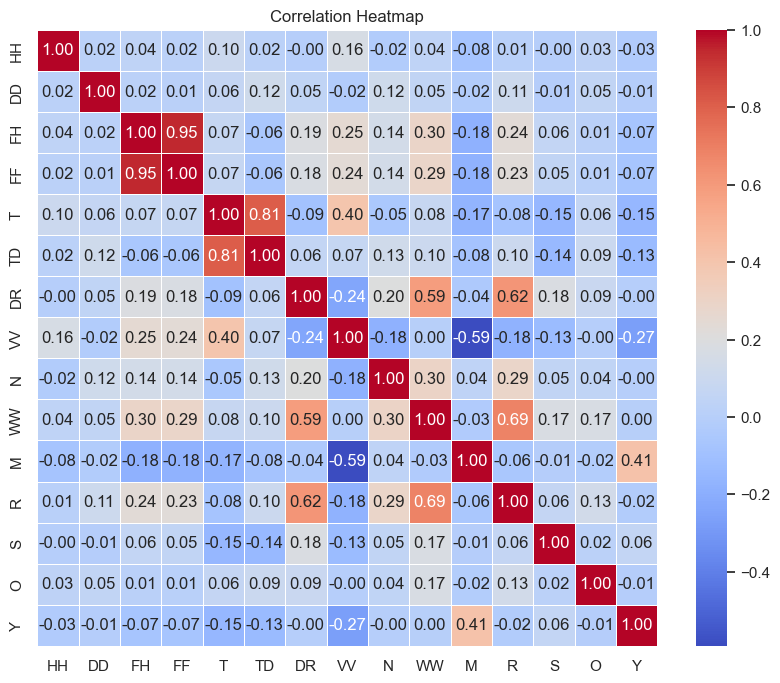

In [ ]:
# Step 1: Replace or remove non-numeric values
features = features.replace(' ', np.nan)  # Replace whitespace with NaN
features = features.dropna()  # Remove rows with NaN values

# Step 2: Convert the data to numeric data types
features = features.apply(pd.to_numeric, errors='coerce')

# Now you can calculate the correlation matrix
correlation_matrix = features.corr()

# Create and display the larger heatmap with two decimal places
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))  # Adjust the figsize to your desired dimensions
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()